# Lead Scoring Case Study
## Problem Statement
An Education company sells online courses to industry professionals, and needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Importing relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1) 
import matplotlib.ticker as plticker
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator

#Model Building libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### 2. Reading and understanding the Data

In [3]:
# Importing the dataset
Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
Leads.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- From the above information, we can observe that some columns have null values.

### 3. Data Cleaning
We observed that some categorical columns had 'select' value in them which is because the customer did not select any option from the list. Such values need to be handled since they are as good as null values.

In [7]:
# To check how many columns have 'select' value in them
select_val = 0

for i in Leads.columns:
    if 'Select' in Leads[i].unique():
        select_val +=1
        columnSeriesObj = Leads[i]
        print('Column Name : ', i)

select_val

Column Name :  Specialization
Column Name :  How did you hear about X Education
Column Name :  Lead Profile
Column Name :  City


4

In [8]:
# Replacing 'Select' with NaN.
Leads.replace("Select", value= np.nan, inplace= True)

In [9]:
# Checking for null values in the dataset.
nulls = round(Leads.isnull().sum()/len(Leads)*100, 2).sort_values(ascending = False)
nulls

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                             1.48 
TotalVisits                                      1.48 
Last Activity                                    1.11 
Lead Source                                      0.39 
Receive More Updates About Our Courses           0.00 
I agree to

In [10]:
# Columns with null values more than 40%
null_40 = nulls[nulls>40]
null_40

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
dtype: float64

In [11]:
# Removing the columns with more than 40% of null values
Leads.drop(["How did you hear about X Education", "Lead Profile", "Lead Quality", "Asymmetrique Profile Score", 
            "Asymmetrique Activity Score", "Asymmetrique Activity Index","Asymmetrique Profile Index"], 1, inplace = True)

In [12]:
# Check the number of unique values is a column
#Leads.nunique().sort_values()

unique_null = {'unique values':Leads.nunique(), "null values": round(Leads.isnull().sum()/len(Leads)*100, 2)}

values = pd.DataFrame(unique_null)
values.sort_values(by =['unique values', 'null values'])

#null_unique = pd.DataFrame(Leads.nunique().sort_values(), Leads.isnull().sum()/len(Leads)*100)
#null_unique.columns = ["variable", "unique values", "null_values(percentage)"]
#null_unique

,unique values,null values
Magazine,1,0.00
Receive More Updates About Our Courses,1,0.00
Update me on Supply Chain Content,1,0.00
Get updates on DM Content,1,0.00
I agree to pay the amount through cheque,1,0.00
Do Not Email,2,0.00
Do Not Call,2,0.00
Converted,2,0.00
Search,2,0.00
Newspaper Article,2,0.00


Removing Tags variable as they are lead-score variable generated by the sales team of the company itself can cause bias in the analysis

In [13]:
# Dropping the column
Leads.drop("Tags",axis=1,inplace=True)

In [14]:
Leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness               73 
E-Business                           57 
Services Excellence                  40 
Name: Specialization, dtype: int64

- We observe from above that the 'Specialization' column does not have a level called 'Other', and therefore the customers belonging to none of the above given specializations would have left this field blank. So we can impute the null values with the level 'Other'.

In [15]:
# Replacing the null values in Specialization column with 'other' category
Leads["Specialization"].replace(to_replace= np.nan, value= "other", inplace= True)

In [16]:
Leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts              752 
Other Cities                   686 
Other Cities of Maharashtra    457 
Other Metro Cities             380 
Tier II Cities                 74  
Name: City, dtype: int64

- We observe from above that the 'City' column is categorical has a level called 'Other Cities', therefore the customers did not leave the field blank on account of lack of options. So the best way to deal with it would be to replace the null values with the mode of the column.

In [17]:
# Replacing null values in "City" column with the mode ('Mumbai')
Leads["City"].replace(to_replace= np.nan, value= Leads["City"].mode().values[0], inplace= True)

In [18]:
Leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional    706 
Student                 210 
Other                   16  
Housewife               10  
Businessman             8   
Name: What is your current occupation, dtype: int64

In [19]:
# Replacing null values in occupation column with the mode ('Unemployed')
Leads["What is your current occupation"].replace(to_replace= np.nan, value= Leads["What is your current occupation"].mode().values[0], inplace= True)

In [20]:
Leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience    2   
Other                        1   
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# Replacing null values in "What matters most to you in choosing a course" column with the mode ('Better Career Prospects')
Leads["What matters most to you in choosing a course"].replace(to_replace= np.nan, value= Leads["What matters most to you in choosing a course"].mode().values[0], inplace = True)

In [22]:
Leads.Country.value_counts()

India                   6492
United States           69  
United Arab Emirates    53  
Singapore               24  
Saudi Arabia            21  
United Kingdom          15  
Australia               13  
Qatar                   10  
Hong Kong               7   
Bahrain                 7   
France                  6   
Oman                    6   
unknown                 5   
Germany                 4   
Kuwait                  4   
South Africa            4   
Nigeria                 4   
Canada                  4   
Sweden                  3   
Bangladesh              2   
Philippines             2   
China                   2   
Italy                   2   
Uganda                  2   
Netherlands             2   
Belgium                 2   
Asia/Pacific Region     2   
Ghana                   2   
Russia                  1   
Malaysia                1   
Kenya                   1   
Switzerland             1   
Vietnam                 1   
Liberia                 1   
Denmark       

In [23]:
# Replacing null values in country column with the mode.
Leads.Country.replace(to_replace= np.nan, value= Leads.Country.mode().values[0], inplace= True)

In [24]:
# Checking the rest of the columns with very less null values
#Leads[(Leads["nulls"] < 10) & (Leads["nulls"] >0)]
nulls[(nulls < 10) & (nulls >0)]

Page Views Per Visit    1.48
TotalVisits             1.48
Last Activity           1.11
Lead Source             0.39
dtype: float64

In [25]:
# Removing these rows with null values
Leads.dropna(axis=0, inplace= True)

In [26]:
# Checking again for null values
Leads.isnull().sum()/len(Leads)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [27]:
# Checking the shape of the data 
Leads.shape

(9074, 29)

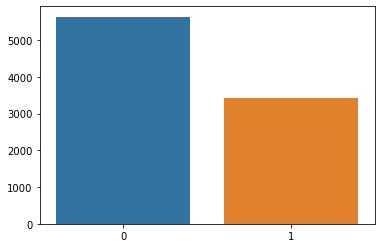

In [28]:
# Checking data imbalance
Leads.Converted.mean()
sns.barplot(Leads.Converted.value_counts().index, y = Leads.Converted.value_counts().values)
plt.show()

- We can observe that the data is fairly balanced, and therefore we can proceed with EDA.

### 4. Exploratory Data Analysis

#### Univariate Analysis

In [29]:
# Defining a function to visualize the categorical variables

categoric_col = ['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Last Activity','Country', 'Specialization', 
                'What is your current occupation','What matters most to you in choosing a course', 'Search', 'Magazine',
                'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations',
                'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                'Get updates on DM Content','City', 'I agree to pay the amount through cheque',
                'A free copy of Mastering The Interview', 'Last Notable Activity']

def uni_viz(col, rot):
    for col in categoric_col:
        
        plt.figure(figsize=[12,8])
        sns.countplot(col, data = Leads, hue = "Converted", palette='magma')
        plt.xlabel(col)
        plt.ylabel("Count")
        if rot:
            plt.xticks(rotation = 90)    

        plt.show()

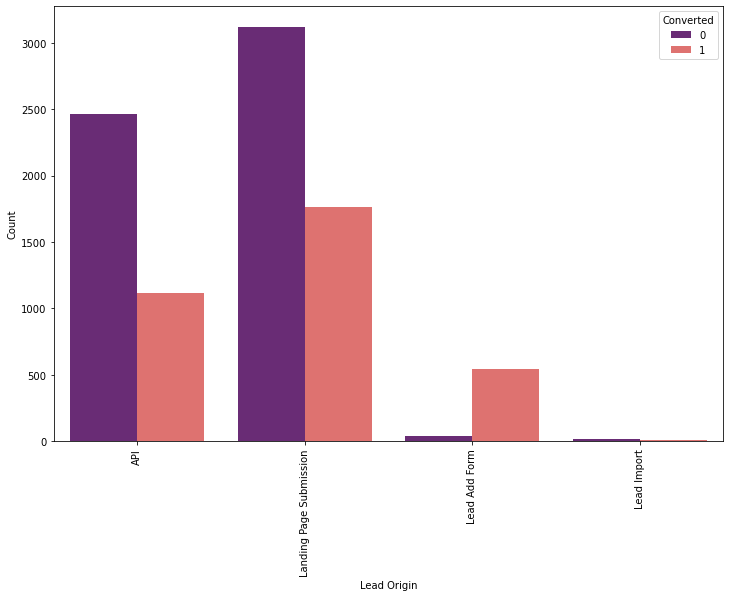

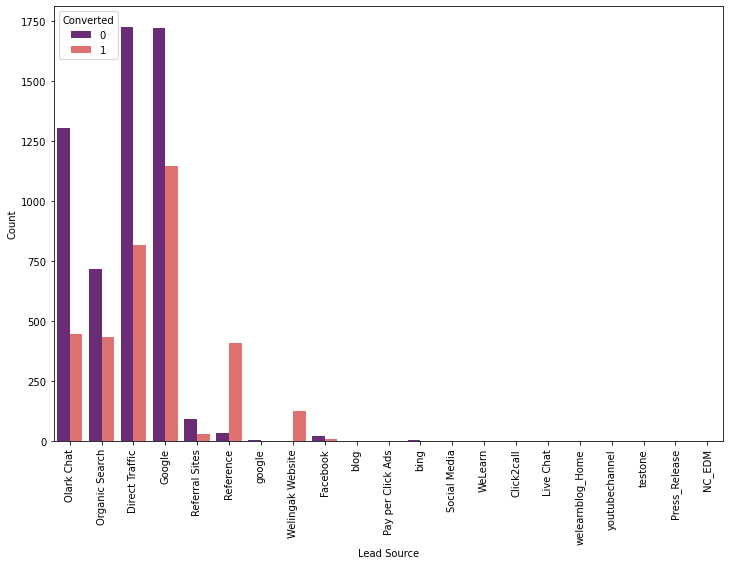

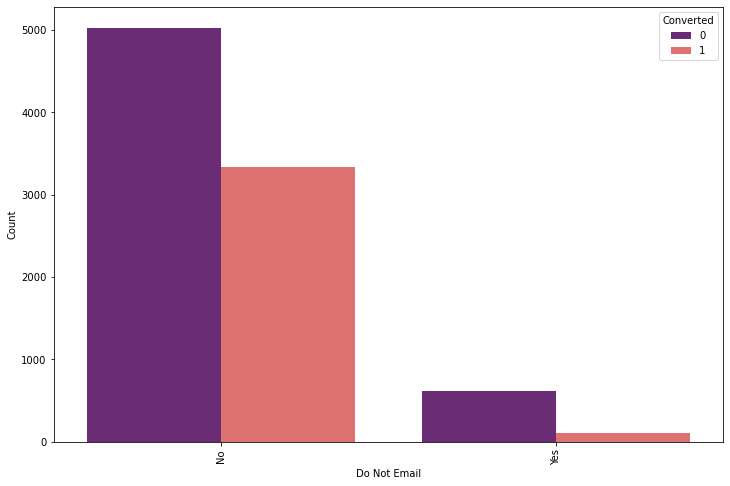

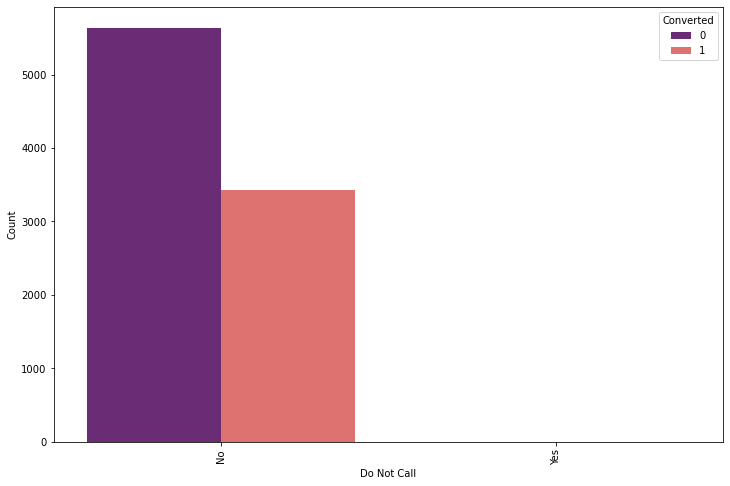

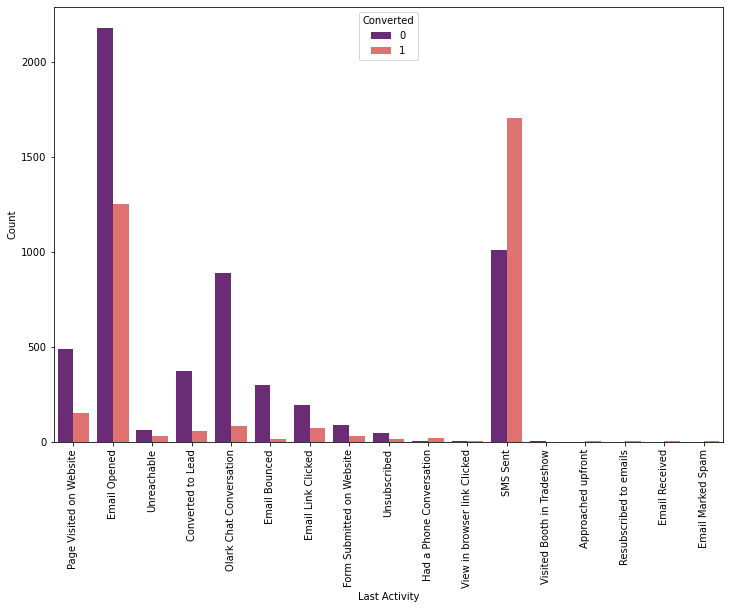

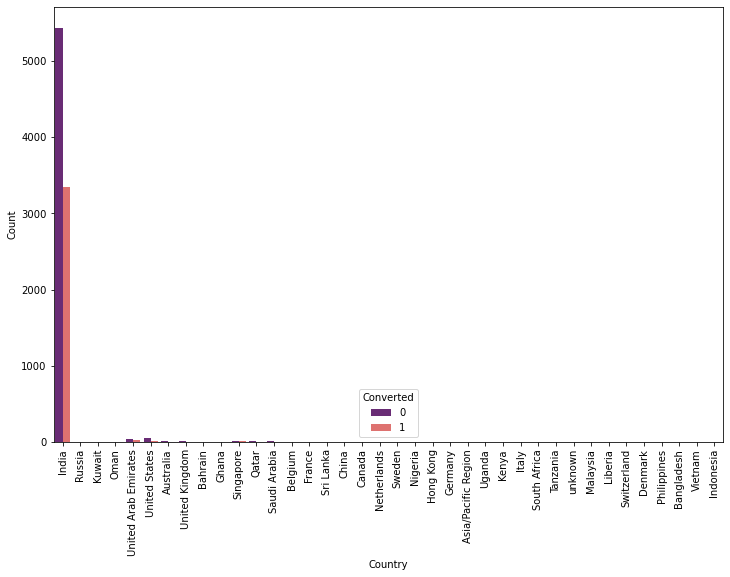

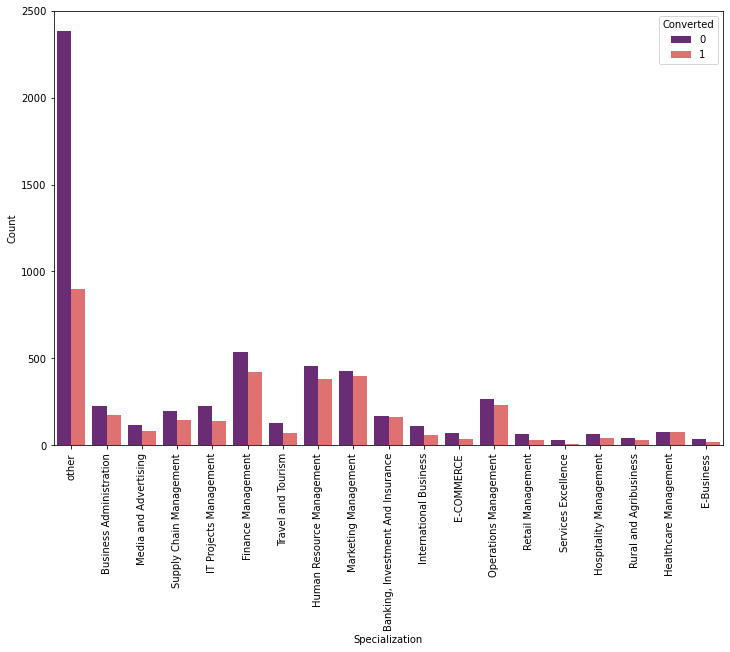

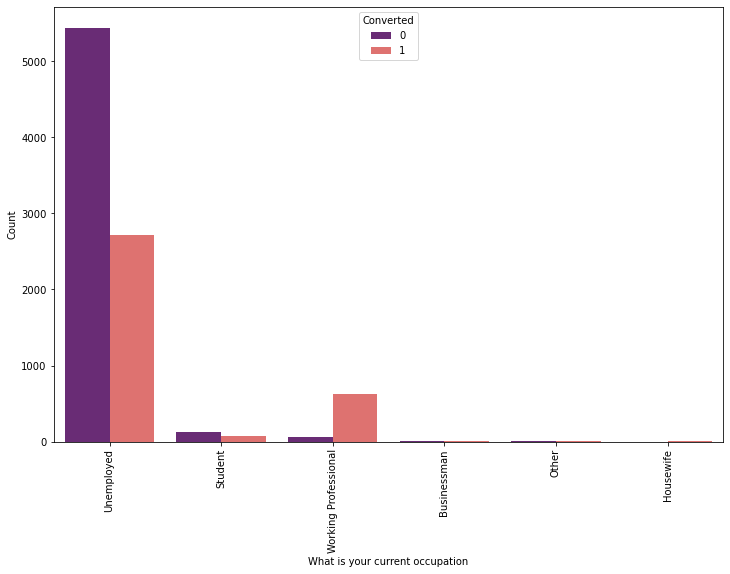

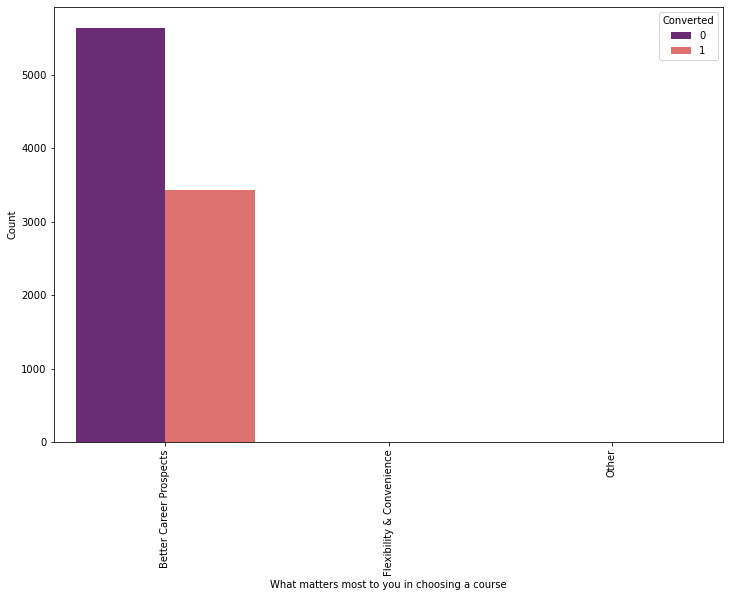

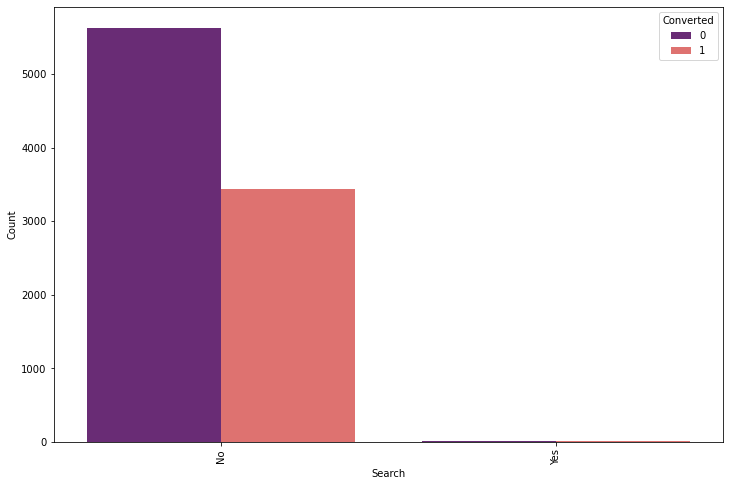

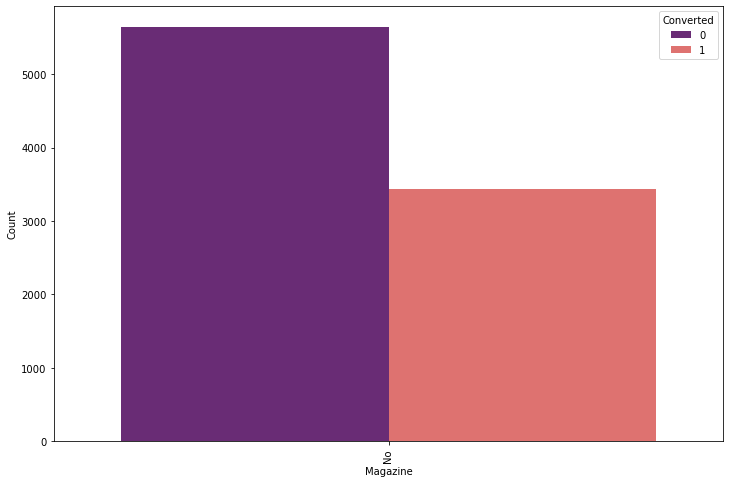

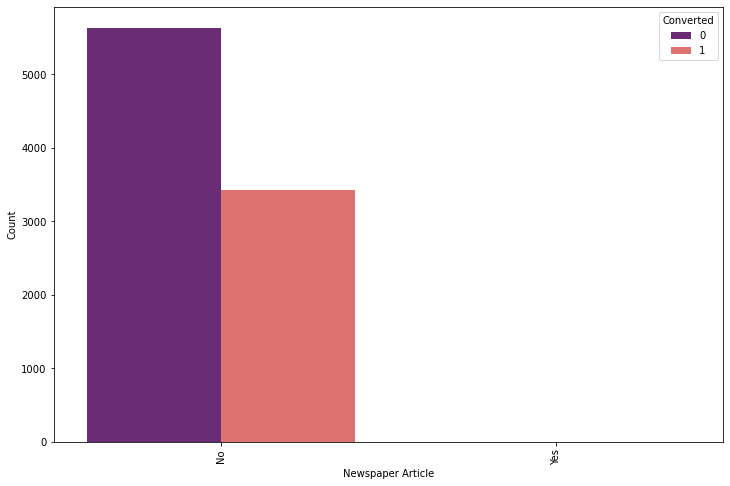

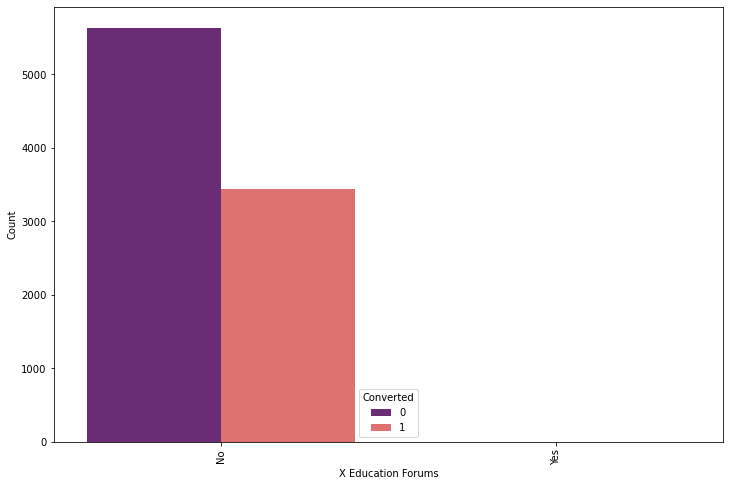

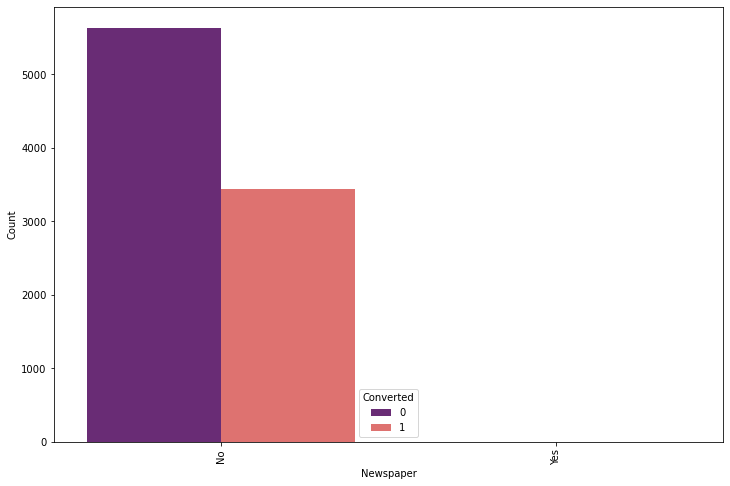

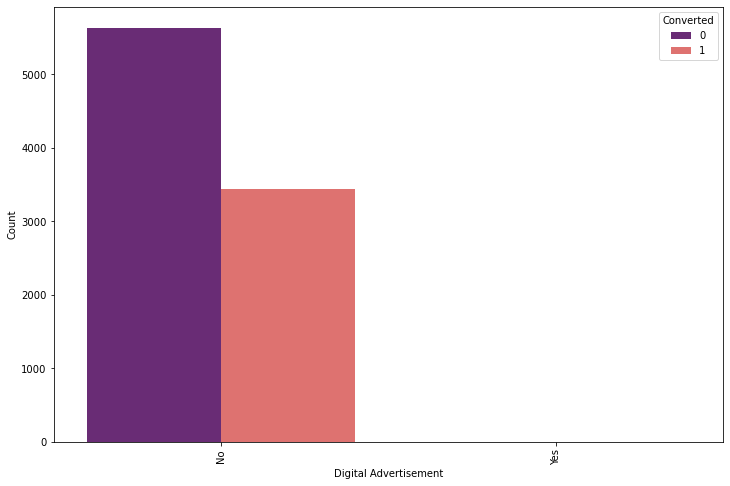

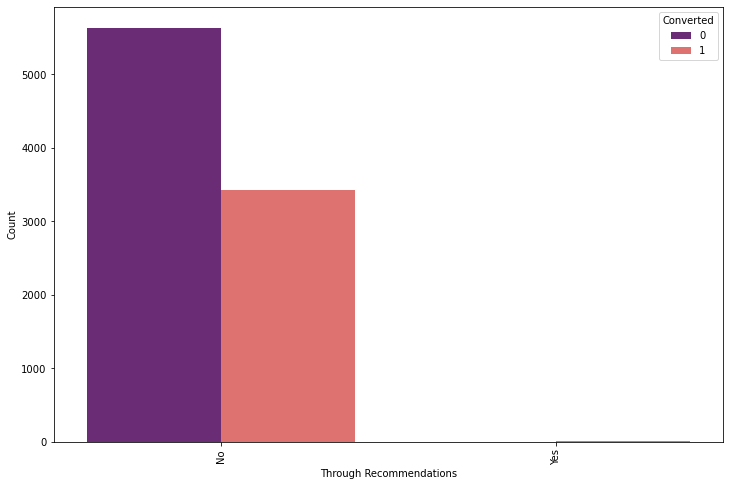

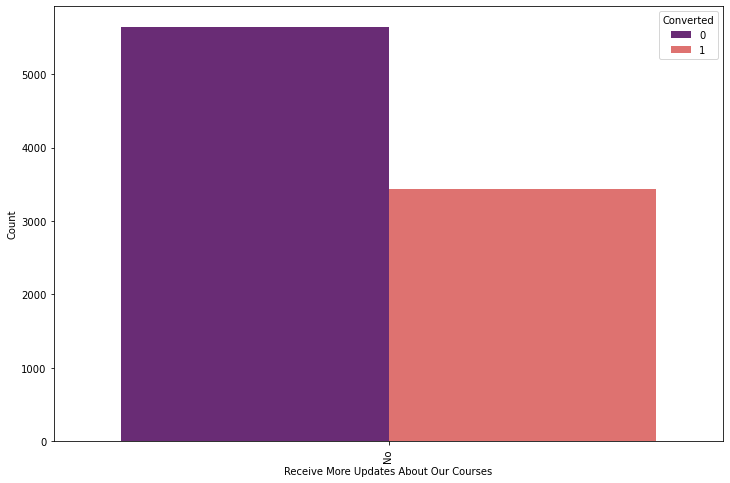

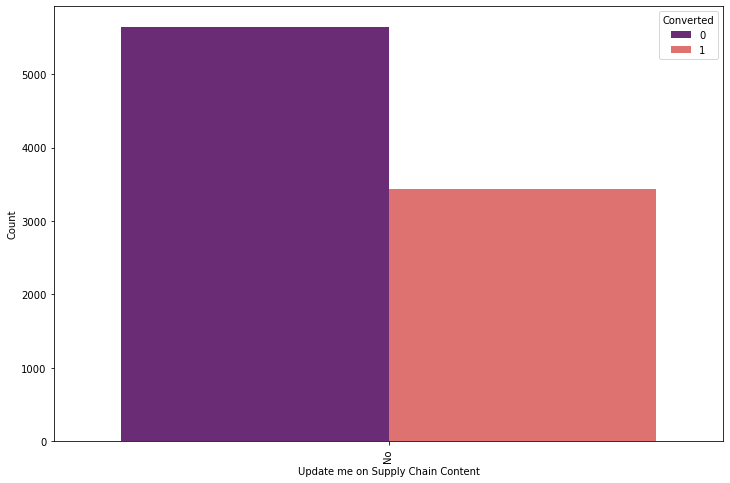

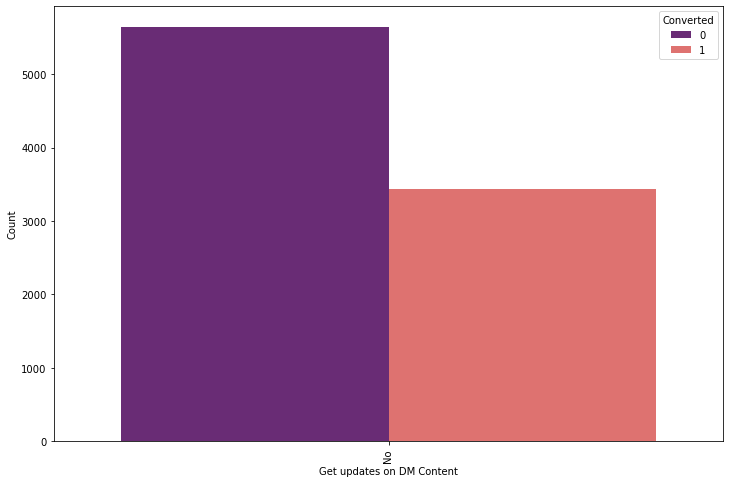

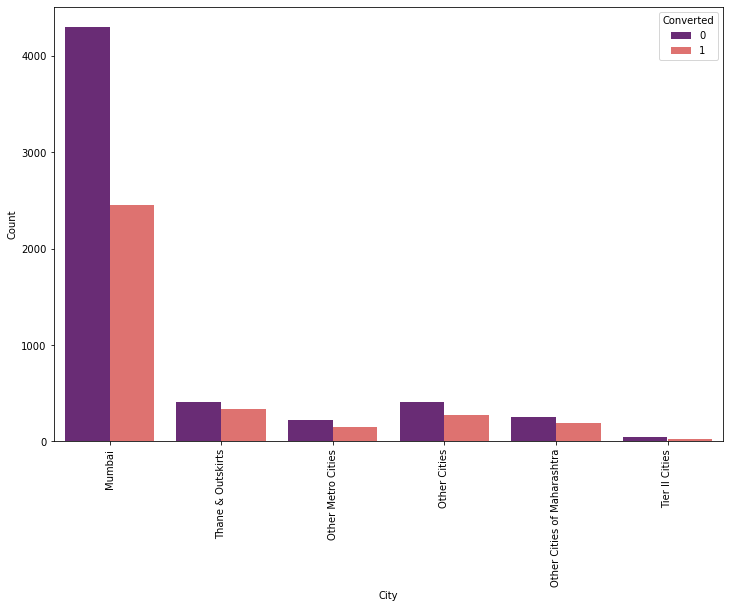

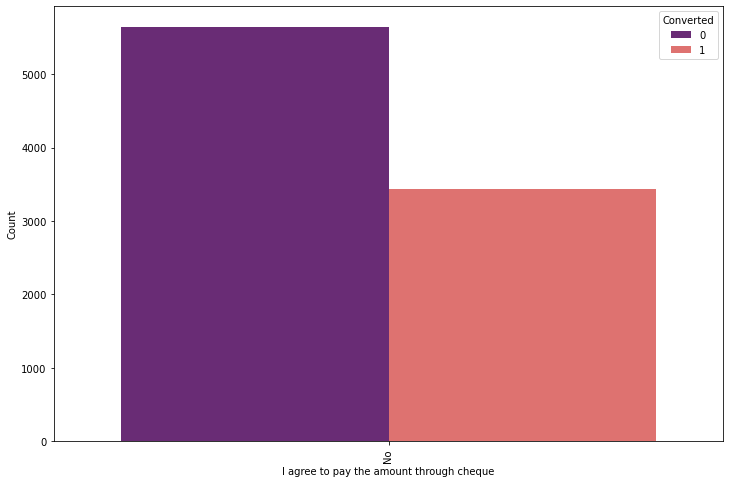

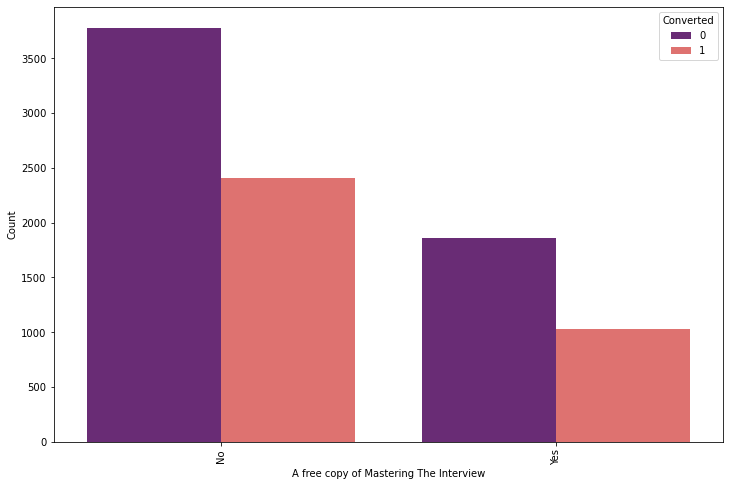

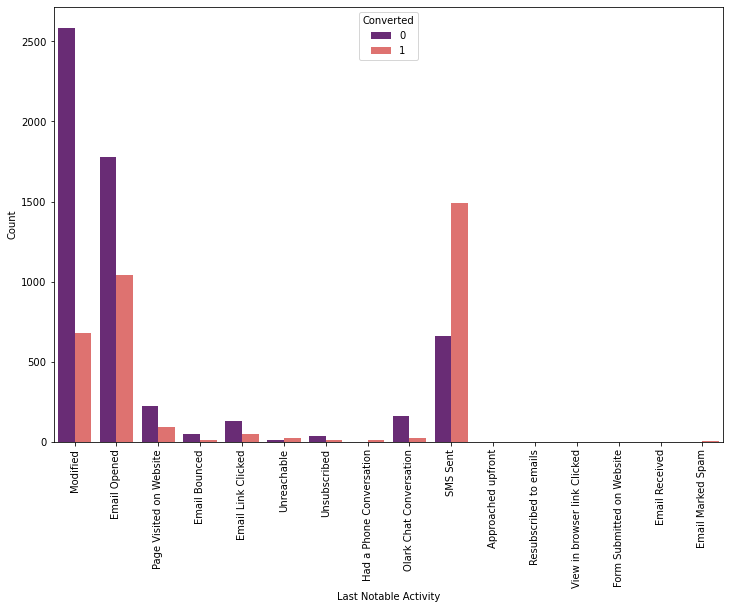

In [30]:
# Visualizing variables
uni_viz(categoric_col, True)

#### Observations:

- The lead count from lead origins 'API' and 'Landing Page Submission' are quite significant.
- Lead origin from ‘Lead Add Form' has a high conversion rate (about 90%) however the count of leads is very low.
- The source of leads coming from 'Google', ‘Direct traffic' and 'Olark Chat' are more however their conversion rate is low.
- 'Reference' and 'welingak website' have a very high conversion rate but the count of leads is very low.
- Most leads have last activity as 'Email Opened' and 'SMS Sent'. 
- The 'SMS sent' category has a pretty high conversion rate.
- Most of the leads are from 'India'.
- Most of the leads are 'unemployed' but with a low conversion rate. 
- Working professionals have a pretty good conversion rate but the lead count is quite low.
- More leads are there for 'Better Career Prospects'.
- Leads with the tag as 'Will revert after reading email' have a good conversion rate in addition to a high number of leads.
- Most of the leads are from 'Mumbai'.
- Leads from 'Mumbai', 'Thane & Outskirts', and from 'other cities of Maharashtra' have a pretty good conversion rate.
 
- We can also observe that columns like 'Last Notable Activity,' 'Tags,' 'Specialization,' 'Last Activity,' and 'Lead Source' have only a few levels with a large number of values, and the remaining levels have very few values, so we can replace them with a single level called 'Others.'

In [31]:
# Replacing the levels having less values with 'Other'.

Leads["Last Notable Activity"].replace(["Unsubscribed", "Unreachable", "Had a Phone Conversation", "Email Marked Spam", 
                                       "View in browser link Clicked", "Email Received", "View in browser link Clicked", 
                                       "Email Received", "Form Submitted on Website", "Approached upfront", 
                                       "Resubscribed to emails"], value= "Other LNA", inplace= True)

Leads["Last Activity"].replace(["Form Submitted on Website", "Unreachable", "Unsubscribed", "Had a Phone Conversation",
                               "View in browser link Clicked", "Approached upfront", "Email Received", "Email Marked Spam",
                               "Visited Booth in Tradeshow", "Resubscribed to emails"], value= "Other LA", inplace= True)

Leads["Lead Source"].replace(["Facebook", "bing", "google", "Click2call", "Social Media", "Live Chat", "Press_Release",
                              "testone", "Pay per Click Ads", "blog", "youtubechannel", "welearnblog_Home", "NC_EDM", "WeLearn"],
                             value="Other LS", inplace= True)

In [32]:
# Defining a function to visualize continuous variables.
continuous_col = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

def uni_viz(col):
    for col in continuous_col:
        plt.figure(figsize=(12,5))
        sns.boxplot(y = col, x = "Converted", data = Leads)
        plt.show()

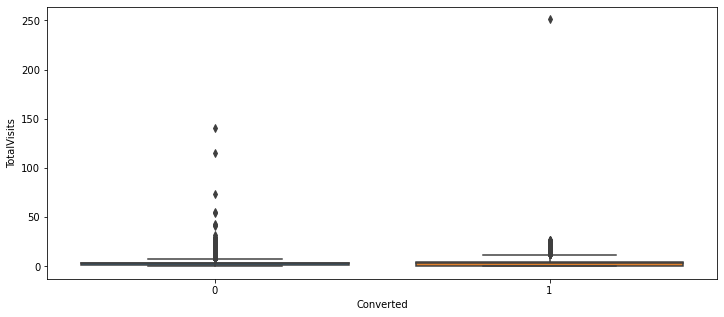

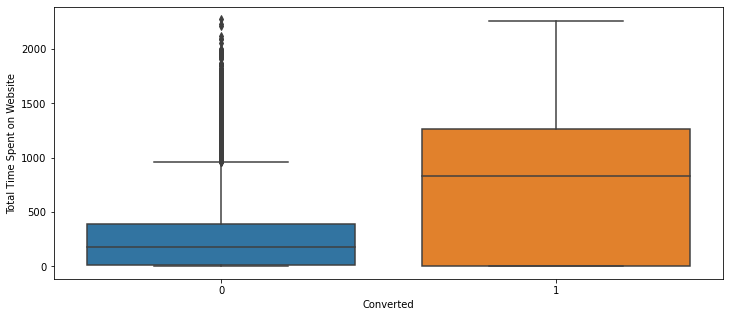

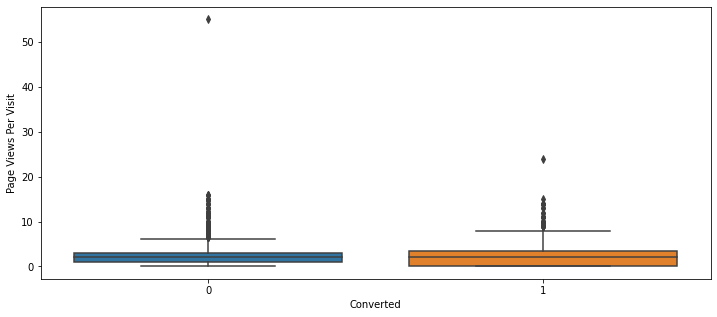

In [33]:
uni_viz(continuous_col)

#### Observations:
- Presence of outliers in 'TotalVisits' and 'Page Views Per Visit' columns.
- Logistic Regression is greatly affected by outliers. We can treat them by capping the 'TotalVisits' and 'Page Views Per Visit' columns to their 95th percentile.

In [34]:
# Outlier treatment

for i in continuous_col: 
    percentile = Leads[i].quantile([0.05,0.95]).values
    Leads[i][Leads[i] <= percentile[0]] = percentile[0]
    Leads[i][Leads[i] >= percentile[1]] = percentile[1]

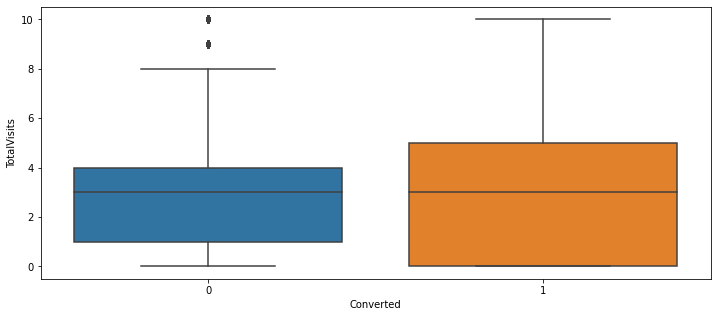

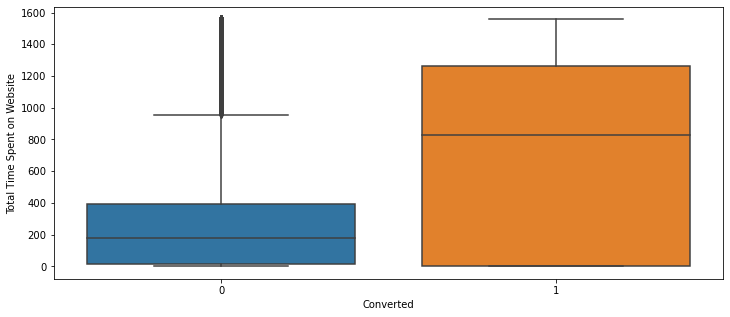

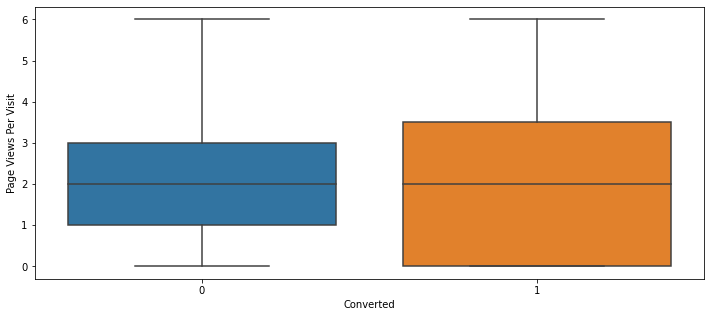

In [35]:
# Visualizing continuous variables after capping the outliers.
uni_viz(continuous_col)

#### Observations: 
- The median value of 'TotalVisits' and  'Page Views Per Visit' is similar for both converted and non converted leads.
- The converted leads spent more time on the website, as seen by the significant rise in the median and IQR.

#### Bivariate Analysis

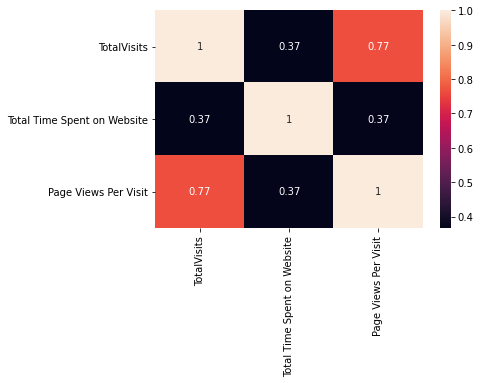

In [36]:
# Heat map to see correlation between continious variable
sns.heatmap(Leads[continuous_col].corr(), annot=True)
plt.show()

- From the above heat map, we can observe that variable "Total visits" is highly correlated with "Page Views Per Visit" with correlation coefficient of 0.77.

We can observe from the above analysis that many columns don't add any value to the model, thus we can remove them for further analysis.

In [37]:
# Dropping unnecessary columns.
Leads = Leads.drop(['Lead Number','What matters most to you in choosing a course','Magazine','Newspaper Article',
                    'X Education Forums','Newspaper','Through Recommendations','Search','Digital Advertisement',
                    'Update me on Supply Chain Content','Receive More Updates About Our Courses', 'Get updates on DM Content',
                    'A free copy of Mastering The Interview','I agree to pay the amount through cheque','Country'], axis = 1)

In [38]:
# Shape of the dataframe after cleaning the dataset
Leads.shape

(9074, 14)

### 5. Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [39]:
Var_List = ["Do Not Email","Do Not Call"] # List of variables to map

# Defining map function.
def binary_map(x):
    return x.map({"Yes": 1, "No": 0})
Leads[Var_List] = Leads[Var_List].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features

In [40]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(Leads[["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation",
                             "City", "Last Notable Activity"]], drop_first= True)

# Concatenating the dummy data frame to the master dataframe.
Leads = pd.concat([Leads, dummy], axis=1)

In [41]:
# Dropping the repeated variables, since we have already created their dummy columns.
Leads.drop(["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation", "City", 
           "Last Notable Activity"], axis = 1, inplace= True)

In [42]:
# Checking the data again
Leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other LS,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other LA,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other LNA,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### 6. Test- Train Split

In [43]:
# Putting the feature variable to x
X = Leads.drop(["Prospect ID", "Converted"], 1)

# Putting the response variable to y
y = Leads["Converted"]

In [44]:
# X dataframe
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other LS,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other LA,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other LNA,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [45]:
# y dataframe
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Train test split of data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### 7. Feature Scaling

In [47]:
# Scaling the data
scaler = StandardScaler()
X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other LS,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other LA,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_other,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other LNA,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,0,-0.432779,-0.150296,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1012,1,0,-0.432779,-0.543632,-0.155018,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.904666,-1.265540,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4750,0,0,-0.432779,1.717578,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
7987,0,0,0.643547,2.053909,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0


In [48]:
# Checking the lead conversion rate.
conversion = sum(Leads["Converted"])/len(Leads)*100
conversion

37.85541106458012

After considering only useful variables, we are able to get a conversion rate of 37.8%

### 8. Model Building
Running our First Training Model

In [49]:
# Building the first model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.9
Date:                Tue, 12 Apr 2022   Deviance:                       5059.7
Time:                        17:09:53   Pearson chi2:                 6.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1162      1.420      0.786      0.432      -1.668       3.900
Do Not Email                                            -1.5754      0.213     -7.397      0.000      -1.993      -1.158
Do Not Call                                             21.5377   3.09e+04      0.001      0.999   -6.06e+04    6.06e+04
TotalVisits                                              0.2939      0.057      5.155      0.000       0.182       0.406
Total Time Spent on Website                              1.1320      0.042     27.254      0.000       1.051       1.213
Page Views Per Visit                                    -0.3161      0.064     -4.959      0.000      -0.441      -0.191
Lead Origin_Landing Page Submission                     -0.9064      0.138     -6.564      0.000      -1.177      -0.636
Lead Origin_Lead Add Form                                1.3836      1.027      1.347      0.178      -0.629       3.396
Lead Origin_Lead Import                                  0.7683      0.781      0.984      0.325      -0.763       2.299
Lead Source_Google                                       0.3392      0.098      3.450      0.001       0.146       0.532
Lead Source_Olark Chat                                   1.3685      0.164      8.327      0.000       1.046       1.691
Lead Source_Organic Search                               0.1635      0.134      1.221      0.222      -0.099       0.426
Lead Source_Other LS                                     0.4544      0.618      0.736      0.462      -0.756       1.665
Lead Source_Reference                                    2.2176      1.048      2.116      0.034       0.163       4.272
Lead Source_Referral Sites                               0.0264      0.354      0.075      0.940      -0.668       0.720
Lead Source_Welingak Website                             4.7729      1.257      3.796      0.000       2.308       7.238
Last Activity_Email Bounced                             -0.1964      0.673     -0.292      0.770      -1.515       1.122
Last Activity_Email Link Clicked                         0.7048      0.433      1.629      0.103      -0.143       1.553
Last Activity_Email Opened                               0.9180      0.255      3.600      0.000       0.418       1.418
Last Activity_Olark Chat Conversation                   -0.3780      0.287     -1.316      0.188      -0.941       0.185
Last Activity_Other LA                                   0.7378      0.324      2.276      0.023       0.103       1.373
Last Activity_Page Visited on Website                    0.5837      0.303      1.930      0.054      -0.009       1.177
Last Activity_SMS Sent                                   1

#### Feature selection using RFE

In [50]:
# Running RFE with 15 variable outcome.
lgr = LogisticRegression()
rfe = RFE(lgr, 15)
rfe = rfe.fit(X_train, y_train)

In [51]:
# List of columns with RFE support and their ranking.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Other LS', False, 24),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 42),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other LA', True, 1),
 ('Last Activity_Page Visited on Website', False, 8),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 29),
 ('Specialization_E-Business', False, 17)

In [52]:
# The 15 columns finalized by RFE.
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Other LA',
       'Last Activity_SMS Sent', 'Specialization_other',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other LNA'],
      dtype='object')

In [53]:
# Dropping columns which do not have RFE Support.
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other LS',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'S

In [54]:
# New dataframe with columns finalized by RFE
X_train_new = X_train[col]

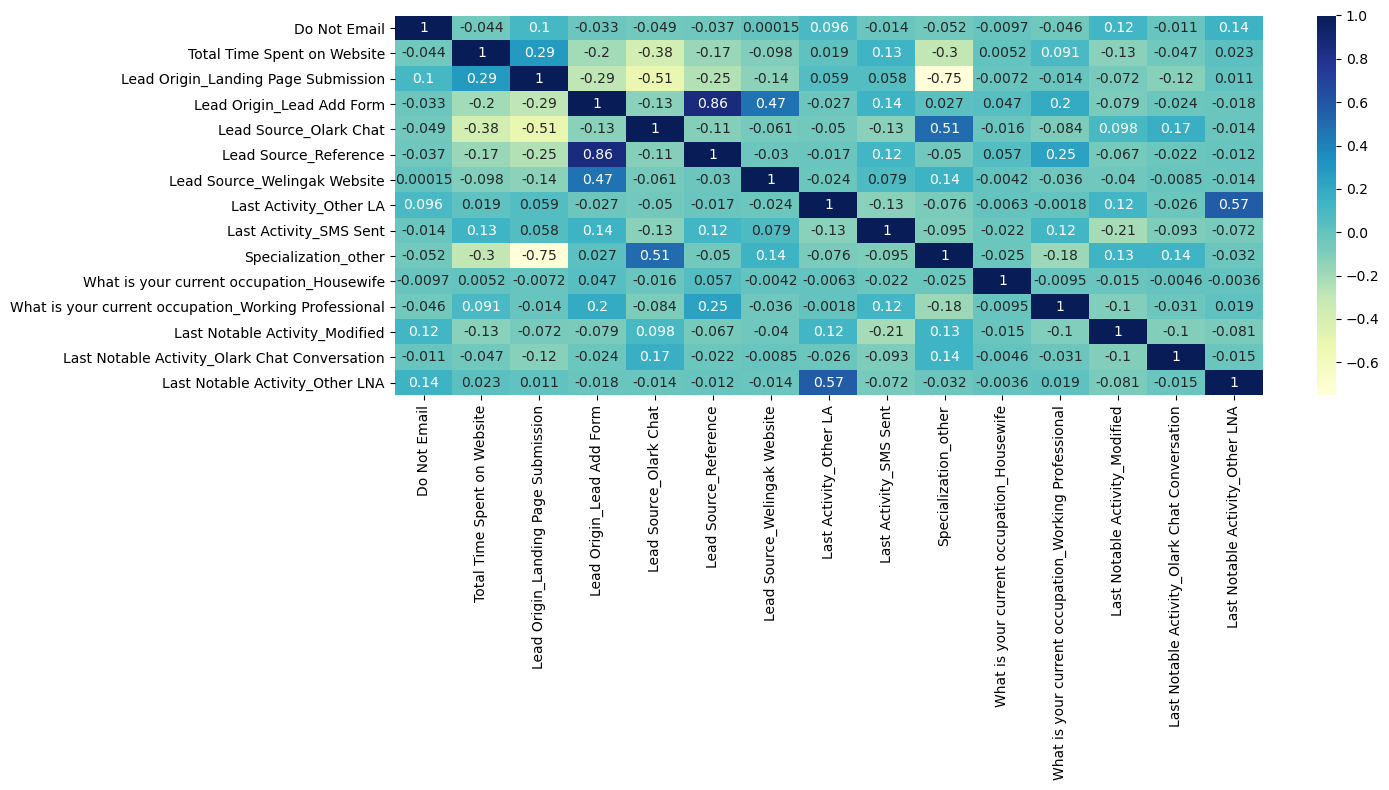

In [55]:
# Let's see the correlation matrix 
plt.figure(figsize=(15,8), dpi=100, facecolor='w', edgecolor='b')

cor = X_train_new.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [56]:
# Dropping "Specialization_other" due to high correlation and comparatively less value to the model
X_train_new.drop("Specialization_other", 1, inplace = True)

In [57]:
# Building the second model using col_rfe.
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.7
Date:                Tue, 12 Apr 2022   Deviance:                       5273.4
Time:                        17:09:57   Pearson chi2:                 6.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0191      0.085    -12.009      0.000      -1.185      -0.853
Do Not Email                                            -1.6769      0.184     -9.100      0.000      -2.038      -1.316
Total Time Spent on Website                              1.1577      0.040     28.692      0.000       1.079       1.237
Lead Origin_Landing Page Submission                     -0.2902      0.088     -3.294      0.001      -0.463      -0.118
Lead Origin_Lead Add Form                                2.1359      0.967      2.210      0.027       0.241       4.030
Lead Source_Olark Chat                                   0.9986      0.118      8.478      0.000       0.768       1.229
Lead Source_Reference                                    1.7271      0.990      1.745      0.081      -0.212       3.667
Lead Source_Welingak Website                             3.6881      1.206      3.058      0.002       1.325       6.052
Last Activity_Other LA                                   0.6188      0.248      2.498      0.013       0.133       1.104
Last Activity_SMS Sent                                   1.3527      0.075     17.950      0.000       1.205       1.500
What is your current occupation_Housewife               22.8862   1.56e+04      0.001      0.999   -3.05e+04    3.05e+04
What is your current occupation_Working Professional     2.7922      0.190     14.689      0.000       2.420       3.165
Last Notable Activity_Modified                          -1.0794      0.080    -13.430      0.000      -1.237      -0.922
Last Notable Activity_Olark Chat Conversation           -1.4462      0.320     -4.522      0.000      -2.073      -0.819
Last Notable Activity_Other LNA                          1.1560      0.392      2.949      0.003       0.388       1.924
========================================================================================================================
"""

- Since 'What is your current occupation_Housewife' has a high p value therefore we will drop the variable.

In [58]:
# Dropping the column 'What is your current occupation_HousewifeLead Origin_Landing Page Submission'.
X_train_new.drop("What is your current occupation_Housewife", 1, inplace = True)

In [59]:
# Building the third model
X_train_sm = sm.add_constant(X_train_new)
logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.3
Date:                Tue, 12 Apr 2022   Deviance:                       5282.7
Time:                        17:09:58   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0143      0.085    -11.967      0.000      -1.180      -0.848
Do Not Email                                            -1.6792      0.184     -9.110      0.000      -2.040      -1.318
Total Time Spent on Website                              1.1571      0.040     28.713      0.000       1.078       1.236
Lead Origin_Landing Page Submission                     -0.2875      0.088     -3.266      0.001      -0.460      -0.115
Lead Origin_Lead Add Form                                2.1335      0.966      2.208      0.027       0.239       4.027
Lead Source_Olark Chat                                   0.9962      0.118      8.463      0.000       0.765       1.227
Lead Source_Reference                                    1.7553      0.989      1.774      0.076      -0.184       3.694
Lead Source_Welingak Website                             3.6892      1.206      3.060      0.002       1.326       6.052
Last Activity_Other LA                                   0.6152      0.248      2.483      0.013       0.130       1.101
Last Activity_SMS Sent                                   1.3470      0.075     17.885      0.000       1.199       1.495
What is your current occupation_Working Professional     2.7878      0.190     14.665      0.000       2.415       3.160
Last Notable Activity_Modified                          -1.0825      0.080    -13.478      0.000      -1.240      -0.925
Last Notable Activity_Olark Chat Conversation           -1.4498      0.320     -4.533      0.000      -2.077      -0.823
Last Notable Activity_Other LNA                          1.1542      0.392      2.944      0.003       0.386       1.923
========================================================================================================================
"""

- Since 'Lead Source_Reference' has a high p value therefore we will drop the variable.

In [60]:
# Dropping the column 'Lead Source_Reference'.
X_train_new.drop("Lead Source_Reference", 1, inplace = True)

In [61]:
# Building the fourth model.
X_train_sm = sm.add_constant(X_train_new)
logm4 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.6
Date:                Tue, 12 Apr 2022   Deviance:                       5285.3
Time:                        17:09:58   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0132      0.085    -11.955      0.000      -1.179      -0.847
Do Not Email                                            -1.6761      0.184     -9.108      0.000      -2.037      -1.315
Total Time Spent on Website                              1.1564      0.040     28.691      0.000       1.077       1.235
Lead Origin_Landing Page Submission                     -0.2887      0.088     -3.280      0.001      -0.461      -0.116
Lead Origin_Lead Add Form                                3.8225      0.232     16.505      0.000       3.369       4.276
Lead Source_Olark Chat                                   0.9928      0.118      8.428      0.000       0.762       1.224
Lead Source_Welingak Website                             1.9974      0.754      2.649      0.008       0.520       3.475
Last Activity_Other LA                                   0.6163      0.248      2.489      0.013       0.131       1.102
Last Activity_SMS Sent                                   1.3474      0.075     17.897      0.000       1.200       1.495
What is your current occupation_Working Professional     2.7894      0.190     14.683      0.000       2.417       3.162
Last Notable Activity_Modified                          -1.0819      0.080    -13.478      0.000      -1.239      -0.925
Last Notable Activity_Olark Chat Conversation           -1.4482      0.320     -4.529      0.000      -2.075      -0.822
Last Notable Activity_Other LNA                          1.1528      0.392      2.942      0.003       0.385       1.921
========================================================================================================================
"""

- We can observe that the p- value of all the variables are well below 0.05.

In [62]:
# Checking VIFs
vif = pd.DataFrame()
vif["Features"] = X_train_new.columns
vif["VIF"] = [variance_inflation_factor(X_train_new.values, i) for i in range (X_train_new.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.66
6,Last Activity_Other LA,1.63
3,Lead Origin_Lead Add Form,1.61
11,Last Notable Activity_Other LNA,1.58
9,Last Notable Activity_Modified,1.52
7,Last Activity_SMS Sent,1.47
4,Lead Source_Olark Chat,1.44
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.31
8,What is your current occupation_Working Professional,1.18


- VIF of all the variables is less than 5

In [63]:
# Predicting y 
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.186065
1012    0.306334
9226    0.309775
4750    0.884078
7987    0.792264
1281    0.761598
2880    0.087916
4971    0.932918
7536    0.745202
1248    0.769729
dtype: float64

In [64]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18606543, 0.30633381, 0.30977483, 0.88407781, 0.79226387,
       0.76159819, 0.08791573, 0.93291752, 0.74520204, 0.7697292 ])

In [65]:
# Creating a DataFrame with actual converted and predicted probability of conversion
y_train_actual_pred = pd.DataFrame({"Converted": y_train.values, "Conversion_probability": y_train_pred})
y_train_actual_pred["Pros_ID"] = y_train.index
y_train_actual_pred.head()

,Converted,Conversion_probability,Pros_ID
0,0,0.186065,3009
1,0,0.306334,1012
2,0,0.309775,9226
3,1,0.884078,4750
4,1,0.792264,7987


In [66]:
# Creating a new column converted_pred with 1 if predicted probability of convertion > 0.5 otherwise 0
y_train_actual_pred["Converted_pred"] = y_train_actual_pred["Conversion_probability"].map(lambda x: 1 if x > 0.5 else 0)
y_train_actual_pred.sort_values(by='Conversion_probability',ascending=False)
y_train_actual_pred.head()

,Converted,Conversion_probability,Pros_ID,Converted_pred
0,0,0.186065,3009,0
1,0,0.306334,1012,0
2,0,0.309775,9226,0
3,1,0.884078,4750,1
4,1,0.792264,7987,1


In [67]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_actual_pred.Converted, y_train_actual_pred.Converted_pred)
print(confusion)

[[3481  424]
 [ 746 1700]]


In [68]:
# Checking the accuracy of the model
metrics.accuracy_score(y_train_actual_pred.Converted, y_train_actual_pred.Converted_pred)

0.8157770429853566

#### Metrics beyond simply accuracy

In [69]:
# Confusion matrix elements
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [70]:
# Calculating sensitivity and specufucuty to evaluate the logistic model

Sensitivity = TP/float(TP + FN)
print("Sensitivity:", Sensitivity)

Specificity = TN/float(TN + FP)
print("Specificity:", Specificity)

Sensitivity: 0.6950122649223222
Specificity: 0.8914212548015364


In [71]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.10857874519846351


In [72]:
# positive predictive value 
print (TP / float(TP+FP))

0.800376647834275


In [73]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8235154956233736


### Plotting the ROC curve


In [74]:
# Defining a function to plot the ROC curve.
def roc(actual, prob):
    fpr, tpr, threshold = metrics.roc_curve(actual, prob, drop_intermediate= False)
    auc_score = metrics.roc_auc_score(actual, prob)
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, label = 'ROC CURVE (Area = %0.2f)' %auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [75]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_actual_pred.Converted, y_train_actual_pred.Conversion_probability, drop_intermediate = False )

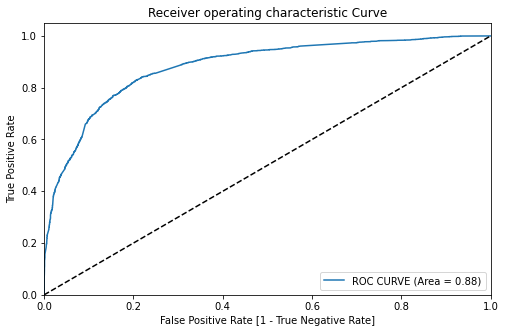

In [76]:
# Plotting the ROC curve
roc(y_train_actual_pred.Converted, y_train_actual_pred.Conversion_probability)

### Finding Optimal Cutoff Point

In [77]:
# Finding the optimal cut off point
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_actual_pred[i] = y_train_actual_pred.Conversion_probability.map(lambda x: 1 if x > i else 0)
y_train_actual_pred.head()

,Converted,Conversion_probability,Pros_ID,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.186065,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.306334,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.309775,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.884078,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.792264,7987,1,1,1,1,1,1,1,1,1,0,0


In [78]:
# Creating a dataframe with accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns=["probability", "accuracy", "sensitivity", "specificity"])
num = [float(x)/10 for x in range(10)]
for i in num:
    conf_m = metrics.confusion_matrix(y_train_actual_pred.Converted, y_train_actual_pred[i])

    total = sum(sum(conf_m))
    accuracy = (conf_m[0,0] + conf_m[1,1])/ total
    
    sensitivity = conf_m[1,1]/(conf_m[1,1]+conf_m[1,0])
    specificity = conf_m[0,0]/(conf_m[0,0]+conf_m[0,1])
    
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.558967,0.974244,0.298848
0.2,0.2,0.749331,0.909648,0.648912
0.3,0.3,0.803496,0.841783,0.779513
0.4,0.4,0.816249,0.769419,0.845583
0.5,0.5,0.815777,0.695012,0.891421
0.6,0.6,0.795150,0.596075,0.919846
0.7,0.7,0.781137,0.518397,0.945711
0.8,0.8,0.759408,0.418234,0.973111
0.9,0.9,0.715163,0.280049,0.987708


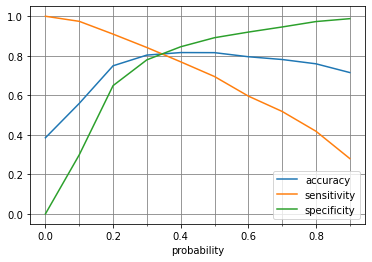

In [79]:
# Plotting accuracy, sensitivity and specificity for various probabilities

ax = cutoff_df.plot.line(x = "probability", y = ["accuracy","sensitivity","specificity"])
ax.grid(which='major', color='grey')
ax.grid(which='minor', color='grey')
ax.minorticks_on()

ax.yaxis.set_minor_locator(AutoMinorLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))

- From the above plot, 0.34 is the optimum point to take it as a cutoff probability

In [80]:
# Adding column final_predicted with 1 if predicted probability of convertion is more than 0.34 otherwise 0.
y_train_actual_pred["final_predicted"] = y_train_actual_pred.Conversion_probability.map(lambda x: 1 if x > 0.34 else 0)
y_train_actual_pred['Lead Score']=(y_train_actual_pred['Conversion_probability']*100).astype("int64")
y_train_actual_pred[:6]

,Converted,Conversion_probability,Pros_ID,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.186065,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.306334,1012,0,1,1,1,1,0,0,0,0,0,0,0,30
2,0,0.309775,9226,0,1,1,1,1,0,0,0,0,0,0,0,30
3,1,0.884078,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.792264,7987,1,1,1,1,1,1,1,1,1,0,0,1,79
5,1,0.761598,1281,1,1,1,1,1,1,1,1,1,0,0,1,76


In [81]:
# Accuracy of the model
metrics.accuracy_score(y_train_actual_pred.Converted, y_train_actual_pred.final_predicted)

0.8083766336010078

In [82]:
# Confusion matrix to evaluate the model
confusion2 = metrics.confusion_matrix(y_train_actual_pred.Converted, y_train_actual_pred.final_predicted)
print(confusion2)

[[3151  754]
 [ 463 1983]]


In [83]:
# Confusion matrix elements
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [84]:
#Calculating sensitivity and specificity for evaluating the logistc model

Sensitivity = TP/float(TP + FN)
print("Sensitivity:", Sensitivity)

Specificity = TN/float(TN + FP)
print("Specificity:", Specificity)

Sensitivity: 0.8107113654946853
Specificity: 0.8069142125480153


In [85]:
# Calculate false postive rate
print(FP / float(TN+FP))

0.19308578745198463


In [86]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7245158933138472


In [87]:
# Negative predictive value
print (TN / float(TN+FN))

0.8718871057000553


### Precision and Recall

In [88]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_actual_pred.Converted, y_train_actual_pred.Converted_pred)
confusion

array([[3481,  424],
       [ 746, 1700]], dtype=int64)

#### Precision
TP / TP + FP

In [89]:
precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.800376647834275

#### Recall
TP / TP + FN

In [90]:
recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.6950122649223222

#### Using sklearn utilities for the same


In [91]:
Precision = metrics.precision_score(y_train_actual_pred.Converted, y_train_actual_pred.Converted_pred)
print("Precision:" ,Precision)
Recall = metrics.recall_score(y_train_actual_pred.Converted, y_train_actual_pred.Converted_pred)
print("Recall:" , Recall)

Precision: 0.800376647834275
Recall: 0.6950122649223222


 ### Precision and recall tradeoff

In [92]:
y_train_actual_pred.Converted, y_train_actual_pred.Converted_pred

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Converted_pred, Length: 6351, dtype: int64)

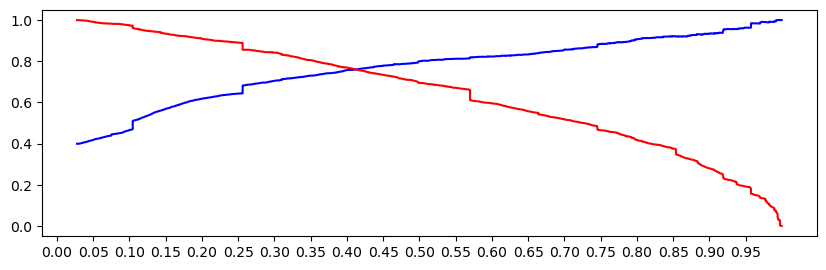

In [93]:
# Plotting the Precision-Recall Trade off Curve
prec, rec, thresholds = precision_recall_curve(y_train_actual_pred.Converted, y_train_actual_pred.Conversion_probability)

plt.figure(figsize=(10, 3), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, prec[:-1], "b-", label = "prec")
plt.plot(thresholds, rec[:-1], "r-", label = "rec")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

According to precision and recall curve 0.41 can be taken as cut off

In [94]:
# Calculating the F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.7439824945295406

### Making predictions on Test data set

In [95]:
X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [96]:
X_test = X_test[col]
X_test.drop(["Specialization_other", "What is your current occupation_Housewife", "Lead Source_Reference"], 1, inplace = True)
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Other LA,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other LNA
3271,0,-0.606338,0,0,0,0,0,0,0,0,0,0
1490,0,1.970301,1,0,0,0,0,0,1,0,0,0
7936,0,-0.764053,0,0,0,0,0,0,0,0,0,0
4216,0,-0.904666,0,1,0,0,0,0,0,1,0,0
3830,0,-0.593037,1,0,0,0,0,0,0,0,0,0


In [97]:
X_test.shape

(2723, 12)

In [98]:
X_test_sm = sm.add_constant(X_test)

In [99]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.152592
1490    0.977378
7936    0.130471
4216    0.663994
3830    0.120493
1800    0.647553
6507    0.327987
4821    0.299532
4223    0.957322
4714    0.309775
dtype: float64

In [100]:
# Creating a DataFrame with actual converted and predicted probability of conversion

y_test_actual_pred = pd.DataFrame({"converted": y_test.values, "probability": y_test_pred})
y_test_actual_pred.reset_index(drop=True, inplace=True)
y_test_actual_pred['Lead Score']=(y_test_actual_pred['probability']*100).astype("int64")
y_test_actual_pred["pros_ID"] = y_test.index
y_test_actual_pred.head()

,converted,probability,Lead Score,pros_ID
0,0,0.152592,15,3271
1,1,0.977378,97,1490
2,0,0.130471,13,7936
3,1,0.663994,66,4216
4,0,0.120493,12,3830


Using the probability threshold value 0f 0.34 on the test dataset to predict if a lead will convert since the goal of the case study is to filter 'hot leads' such that 80% of such leads have a higher probability of conversion 

In [101]:
# Adding column predicted_conv with 1 if predicted probability of convertion is more than 0.34 otherwise 0
y_test_actual_pred["predicted_conv"] = y_test_actual_pred.probability.map(lambda x: 1 if x > 0.34 else 0)
y_test_actual_pred.head()

,converted,probability,Lead Score,pros_ID,predicted_conv
0,0,0.152592,15,3271,0
1,1,0.977378,97,1490,1
2,0,0.130471,13,7936,0
3,1,0.663994,66,4216,1
4,0,0.120493,12,3830,0


In [102]:
# Accuracy of the model
metrics.accuracy_score(y_test_actual_pred.converted, y_test_actual_pred.predicted_conv)

0.803892765332354

In [103]:
# Confusion matrix
confusion_mat = metrics.confusion_matrix(y_test_actual_pred.converted, y_test_actual_pred.predicted_conv)
print(confusion_mat)

[[1403  331]
 [ 203  786]]


In [104]:
# Confusion matrix elements.
TP = confusion_mat[1,1]
TN = confusion_mat[0,0]
FP = confusion_mat[0,1]
FN = confusion_mat[1,0]

In [105]:
# Calculating Sensitivity and Specificity to evaluate the logistic model

Sensitivity = TP/float(TP + FN)
print("Sensitivity:", Sensitivity)

Specificity = TN/float(TN + FP)
print("Specificity:", Specificity)

Sensitivity: 0.7947421638018201
Specificity: 0.8091118800461361


In [106]:
# Calculating parameters to evaluate the logistic model

Precision = metrics.precision_score(y_test_actual_pred.converted, y_test_actual_pred.predicted_conv)
print("Precision:" ,Precision)

Recall = metrics.recall_score(y_test_actual_pred.converted, y_test_actual_pred.predicted_conv)
print("Recall:" , Recall)

Precision: 0.7036705461056401
Recall: 0.7947421638018201


#### Observations:
- The sensitivity for the test data is 79.47% and 81.07% for the train data.
- The accuracy for test data is 80.38% and 80.83% for the train data.

#### Conclusion:
The Education company needs to focus on the following factors to improve conversion rate of leads:

- The total time spent on the website impacts the conversion rate.
- Leads from lead origin 'Lead Add Form' have a high conversion rate.
- Leads both sourced from 'Olark Chat' also have decent conversion rate.
- Leads with lead source 'Welingak website' have a high conversion rate.
- Leads with last notable activity as 'SMS sent' have a high conversion rate.
- Leads who are working professionals have a pretty high conversion rate.
- Can also focus on leads with other last notable activities as: modified, page visited on website.